In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
data = pd.read_csv('DBSCAN_Data.csv')

In [13]:
# Define the DBSCAN functions
def dbscan(X, eps, minPts):
    labels = np.full(X.shape[0], -1)
    cluster_id = 0

    def region_query(point_id):
        point = X[point_id]
        distances = np.linalg.norm(X - point, axis=1)
        neighbors = np.where(distances <= eps)[0]
        return neighbors

    def expand_cluster(point_id, neighbors):
        nonlocal cluster_id
        labels[point_id] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_id = neighbors[i]
            if labels[neighbor_id] == -1:
                labels[neighbor_id] = cluster_id
            elif labels[neighbor_id] == 0:
                labels[neighbor_id] = cluster_id
                new_neighbors = region_query(neighbor_id)
                if len(new_neighbors) >= minPts:
                    neighbors = np.concatenate((neighbors, new_neighbors))
            i += 1

    for point_id in range(X.shape[0]):
        if labels[point_id] == -1:
            neighbors = region_query(point_id)
            if len(neighbors) >= minPts:
                cluster_id += 1
                expand_cluster(point_id, neighbors)

    return labels

In [17]:
# Plot clusters
def plot_clusters(data, labels):
    unique_labels = set(labels)
    colors = [plt.cm.viridis(each) for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure(figsize=(10, 6))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Black used for noise.

        class_member_mask = (labels == k)

        xy = data[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title('DBSCAN Clustering')
    plt.xlabel('Weight')
    plt.ylabel('Height')
    plt.show()

[1 1 2 2 1 2 2 2 2 3 2 1 2 3 2 2 1 2 3 2 2 1 2 3 2 3 1 2 3 2 2 2 1 2 2 1 3
 2 3 1 3 2 2 1 2 1 2 2 1 1 3 3 1 2 2 2 2 3 3 1 1 3 1 1 1 2 2 1 2 2 3 2 3 1
 3 1 2 2 2 2 3 2 3 2 2 2 3 3 1 3 3 3 1 3 2 2 1 1 1 2 3 3 1 3 2 2 2 1 2 3 3
 2 3 3 1 3 1 2 2 1 2 3 1 1 3 1 1 1 1 3 2 3 2 3 3 3 2 1 2 2 1 1 1 1 2 3 2 2
 2 3 3 1 2 2 2 2 2 1 2 2 1 2 1 1 2 2 1 2 3 2 1 3 1 2 2 3 2 3 3 3 1 1 1 2 2
 3 2 1 2 3 1 2 3 2 2 3 2 2 2 3 3 2 2 2 2 2 2 2 2 1 2 1 1 1 2 1 2 3 3 3 2 1
 2 3 2 1 3 2 3 2 2 2 2 2 2 2 2 2 3 1 1 2 2 1 3 3 2 1 2 2 2 2 1 3 2 3 3 2 3
 2 2 2 1 3 1 1 2 2 3 1 2 3 1 2 1 3 2 2 2 1 1 2 1 2 1 2 2 1 2 2 2 1 3 3 1 3
 3 3 2 1 1 3 2 3 1 1 2 3 3 2 3 2 1 2 3 2 3 2 2 2 2 2 2 2 3 1 2 2 3 1 2 2 1
 1 2 1 2 2 2 2 3 1 1 2 1 2 1 1 1 1 2 1 2 1 2 2 3 1 2 3 3 2 2 1 1 2 2 1 2 3
 2 2 2 3 2 2 2 3 3 2 3 3 2 3 3 2 2 2 2 3 3 3 3 1 3 1 2 1 3 2 1 2 1 2 2 2 3
 2 3 2 2 1 3 2 2 1 3 2 2 2 1 2 1 2 1 2 1 3 2 1 3 1 2 1 2 2 1 3 2 2 2 1 1 2
 2 2 2 2 3 1 2 1 3 2 2 2 3 2 2 3 2 2 1 2 1 2 3 1 2 1 2 1 2 3 2 3 2 3 2 3 2
 2 2 3 2 2 2 3 1 2 2 3 2 

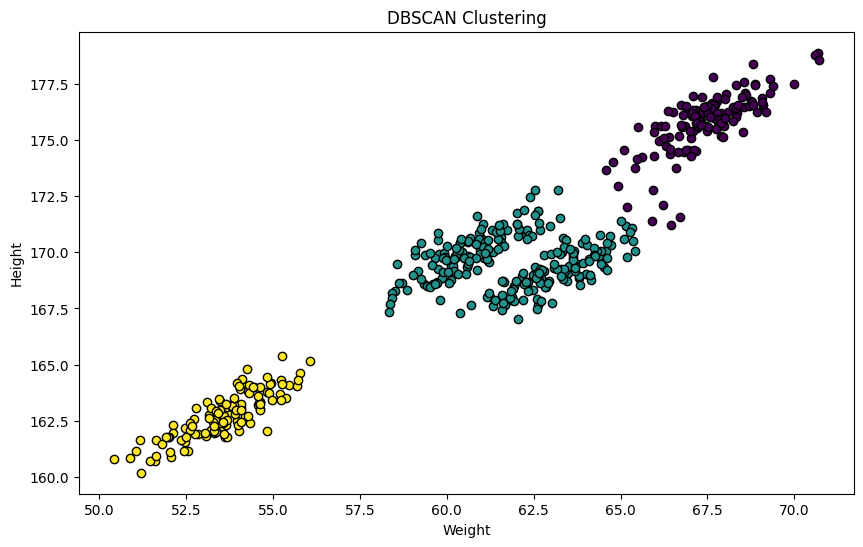

In [18]:
# data = load_data(file_path)
X = data[['Weight', 'Height']].values

eps = 5  # Set epsilon value
minPts = 15  # Set minimum points

labels = dbscan(X, eps, minPts)
print(labels)
plot_clusters(X, labels)